# Practica Modelo de Análisis de riesgo de concesión de hipoteca bancaria.

### Gorka Sánchez de Pedro Barrios. 

#### 19-04-2023

#### Carga de Datos y paquetes

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


random_state = 100
warnings.filterwarnings('ignore')

In [179]:
df=pd.read_csv("pd_data_initial_preprocessing.csv")

In [180]:
df.head()

,id,url,zip_code,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,...,initial_list_status,application_type,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
0,112435993,https://lendingclub.com/browse/loanDetail.acti...,148xx,NaN,NaN,NaN,NaN,55.0,1.0,2315.0,...,w,Individual,0.0,0.0,2300.0,0.0,381.0,4.0,9.0,1985.0
1,112290210,https://lendingclub.com/browse/loanDetail.acti...,021xx,NaN,69.0,NaN,26.0,94.0,0.0,1962.0,...,w,Individual,0.0,0.0,16000.0,7.0,300.0,9.0,6.0,1992.0
2,112436985,https://lendingclub.com/browse/loanDetail.acti...,018xx,NaN,NaN,NaN,10.0,45.0,1.0,1950.0,...,w,Individual,0.0,0.0,6025.0,2.0,180.0,11.0,6.0,2002.0
3,112439006,https://lendingclub.com/browse/loanDetail.acti...,913xx,NaN,95.0,NaN,6.0,60.0,1.0,4240.0,...,w,Individual,0.0,0.0,20400.0,0.0,125.0,15.0,1.0,2007.0
4,112438929,https://lendingclub.com/browse/loanDetail.acti...,560xx,NaN,72.0,26.0,127.0,78.0,0.0,2996.0,...,w,Individual,0.0,0.0,13000.0,1.0,184.0,5.0,2.0,2002.0


## Pregunta 1: Análisis Descriptivo

Descripcion del Data set

In [181]:

print("Número de filas y columnas: ", df.shape)
print("Nombres de las columnas: ", df.columns)
print("Número total de registros: ", df.size)


Número de filas y columnas:  (884884, 51)
Nombres de las columnas:  Index(['id', 'url', 'zip_code', 'mths_since_last_record', 'il_util',
       'mths_since_recent_bc_dlq', 'mths_since_rcnt_il', 'all_util', 'inq_fi',
       'max_bal_bc', 'total_cu_tl', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'total_bal_il', 'open_rv_12m', 'open_rv_24m',
       'open_il_24m', 'inq_last_12m', 'mths_since_last_major_derog',
       'mths_since_recent_revol_delinq', 'mths_since_last_delinq', 'emp_title',
       'emp_length', 'mo_sin_old_il_acct', 'revol_util', 'dti',
       'verification_status', 'annual_inc', 'home_ownership', 'sub_grade',
       'grade', 'term', 'int_rate', 'installment', 'loan_status', 'total_acc',
       'purpose', 'addr_state', 'fico_range_low', 'fico_range_high',
       'initial_list_status', 'application_type', 'pub_rec',
       'pub_rec_bankruptcies', 'loan_amnt', 'mort_acc', 'mo_sin_old_rev_tl_op',
       'open_acc', 'earliest_cr_line_month', 'earliest_cr_line_year'],
  

In [182]:
df.dtypes

id                                 object
url                                object
zip_code                           object
mths_since_last_record            float64
il_util                           float64
mths_since_recent_bc_dlq          float64
mths_since_rcnt_il                float64
all_util                          float64
inq_fi                            float64
max_bal_bc                        float64
total_cu_tl                       float64
open_acc_6m                       float64
open_act_il                       float64
open_il_12m                       float64
total_bal_il                      float64
open_rv_12m                       float64
open_rv_24m                       float64
open_il_24m                       float64
inq_last_12m                      float64
mths_since_last_major_derog       float64
mths_since_recent_revol_delinq    float64
mths_since_last_delinq            float64
emp_title                          object
emp_length                        

In [183]:
df['loan_status'].value_counts()

Current               422685
Fully Paid            345520
Charged Off            97047
Late (31-120 days)     11168
In Grace Period         5507
Late (16-30 days)       2915
Default                   34
Name: loan_status, dtype: int64

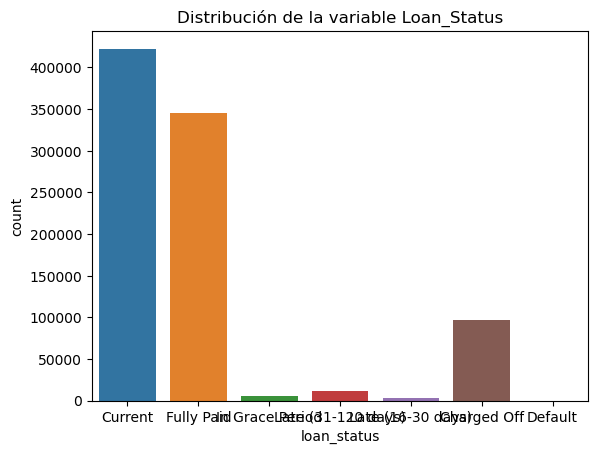

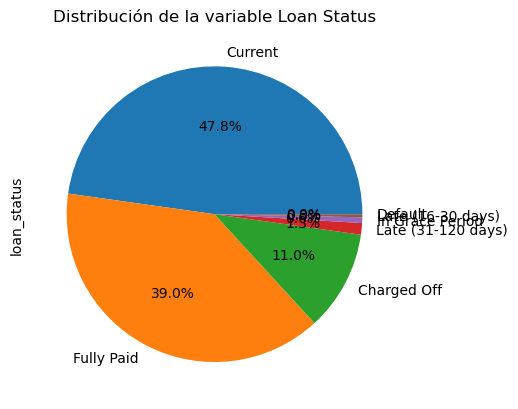

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(data=df, x='loan_status')
plt.title('Distribución de la variable Loan_Status')
plt.show()

df['loan_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribución de la variable Loan Status')
plt.show()


In [185]:
df= df[(df['loan_status']== 'Fully Paid') |
       (df['loan_status']=='Charged Off')]

In [186]:
df.shape

(442567, 51)

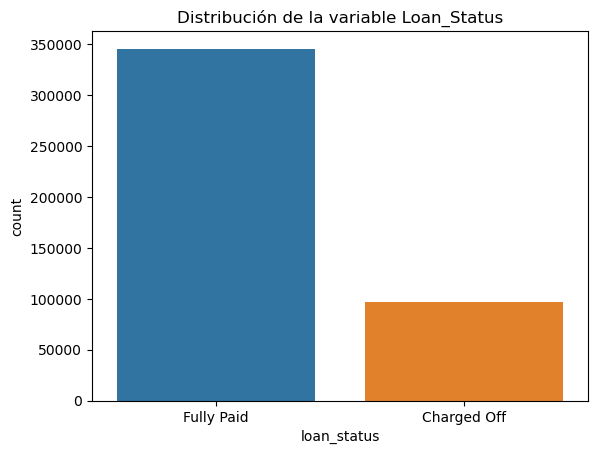

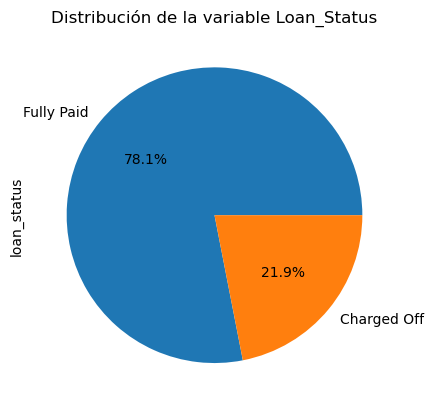

In [187]:
sns.countplot(data=df, x='loan_status')
plt.title('Distribución de la variable Loan_Status')
plt.show()


df['loan_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribución de la variable Loan_Status')
plt.show()


In [188]:
df= df.drop(columns=["url","zip_code"])

In [189]:
df=df.set_index(["id"])


Valores Nulos

In [190]:
na_count=df.isna().sum()
na_count

mths_since_last_record            359529
il_util                           421002
mths_since_recent_bc_dlq          326642
mths_since_rcnt_il                418344
all_util                          417786
inq_fi                            417783
max_bal_bc                        417783
total_cu_tl                       417783
open_acc_6m                       417783
open_act_il                       417783
open_il_12m                       417783
total_bal_il                      417783
open_rv_12m                       417783
open_rv_24m                       417783
open_il_24m                       417783
inq_last_12m                      417783
mths_since_last_major_derog       312697
mths_since_recent_revol_delinq    283394
mths_since_last_delinq            215680
emp_title                          25015
emp_length                         23874
mo_sin_old_il_acct                 12680
revol_util                           214
dti                                   18
verification_sta

In [191]:
(na_count/len(df))*100

mths_since_last_record            81.237191
il_util                           95.127291
mths_since_recent_bc_dlq          73.806226
mths_since_rcnt_il                94.526704
all_util                          94.400622
inq_fi                            94.399944
max_bal_bc                        94.399944
total_cu_tl                       94.399944
open_acc_6m                       94.399944
open_act_il                       94.399944
open_il_12m                       94.399944
total_bal_il                      94.399944
open_rv_12m                       94.399944
open_rv_24m                       94.399944
open_il_24m                       94.399944
inq_last_12m                      94.399944
mths_since_last_major_derog       70.655291
mths_since_recent_revol_delinq    64.034146
mths_since_last_delinq            48.733864
emp_title                          5.652252
emp_length                         5.394437
mo_sin_old_il_acct                 2.865103
revol_util                      

In [192]:
cat_features= (df.dtypes[df.dtypes=='object'].index.to_list())
num_features= (df.dtypes[df.dtypes != 'object'].index.to_list())

In [193]:
df_num = df.select_dtypes(include='number')

#### Analisis Descriptivo Variables Numéricas

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns


print("Resumen estadístico de variables numéricas:")
print(df_num.describe())



Resumen estadístico de variables numéricas:
       mths_since_last_record       il_util  mths_since_recent_bc_dlq  \
count            83038.000000  21565.000000             115925.000000   
mean                69.268311     72.114445                 40.322415   
std                 26.796246     22.745747                 22.823501   
min                  0.000000      0.000000                  0.000000   
25%                 51.000000     59.000000                 21.000000   
50%                 68.500000     75.000000                 39.000000   
75%                 88.000000     88.000000                 60.000000   
max                121.000000    250.000000                176.000000   

       mths_since_rcnt_il      all_util        inq_fi     max_bal_bc  \
count        24223.000000  24781.000000  24784.000000   24784.000000   
mean            18.130166     57.579759      1.173217    5564.810926   
std             23.474962     21.325961      1.628656    5303.770439   
min       

Matriz de correlación de variables numéricas:


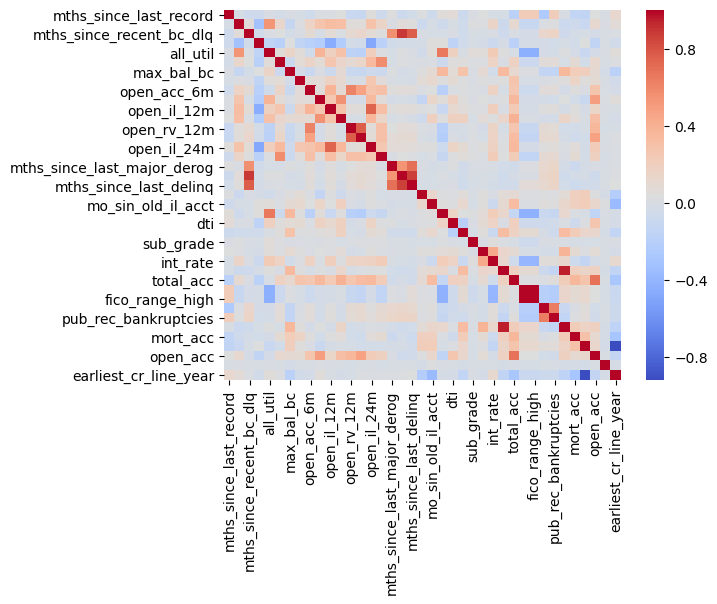

In [195]:
print("Matriz de correlación de variables numéricas:")
corr_matrix = df_num.corr()
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()


## Pregunta 2: Tratamiento Valores Missing

Las variables con un % de Nas de entre 95% y 48% las sustituyo por un valor muy diferente al de la muestra


Las varibles con poco % de Nas sustituyo los valores por la media de cada variable excepto las variables categoricas que las reemplazo con NO VALUE

In [196]:
columns_with_na = ["mths_since_last_record", "il_util", "mths_since_recent_bc_dlq", "mths_since_rcnt_il", "all_util", "inq_fi", "max_bal_bc", "total_cu_tl", "open_acc_6m", "open_act_il", "open_il_12m", "total_bal_il", "open_rv_12m", "open_rv_24m", "open_il_24m", "inq_last_12m", "mths_since_last_major_derog", "mths_since_recent_revol_delinq", "mths_since_last_delinq"]

In [197]:
df[columns_with_na] = df[columns_with_na].fillna(-100)

In [198]:
columns_with_na2 = ["emp_length", "mo_sin_old_il_acct", "revol_util", "dti"]


In [199]:
df[columns_with_na2].dtypes

emp_length            float64
mo_sin_old_il_acct    float64
revol_util            float64
dti                   float64
dtype: object

In [200]:
for col in columns_with_na2:
    col_mean = df[col].mean()
    df[col].fillna(col_mean, inplace=True)

In [201]:
df['emp_title'].fillna('NO VALUE', inplace=True)

In [202]:
df.isna().sum()

mths_since_last_record            0
il_util                           0
mths_since_recent_bc_dlq          0
mths_since_rcnt_il                0
all_util                          0
inq_fi                            0
max_bal_bc                        0
total_cu_tl                       0
open_acc_6m                       0
open_act_il                       0
open_il_12m                       0
total_bal_il                      0
open_rv_12m                       0
open_rv_24m                       0
open_il_24m                       0
inq_last_12m                      0
mths_since_last_major_derog       0
mths_since_recent_revol_delinq    0
mths_since_last_delinq            0
emp_title                         0
emp_length                        0
mo_sin_old_il_acct                0
revol_util                        0
dti                               0
verification_status               0
annual_inc                        0
home_ownership                    0
sub_grade                   

## Pregunta 3: Transformación Variables

In [203]:
{i:df[i].nunique()for i in cat_features}

{'emp_title': 125012,
 'verification_status': 3,
 'home_ownership': 4,
 'grade': 7,
 'loan_status': 2,
 'purpose': 14,
 'addr_state': 51,
 'initial_list_status': 2,
 'application_type': 2}

In [204]:
df['emp_title'].value_counts()

NO VALUE                                   25015
Teacher                                     7980
Manager                                     7273
Registered Nurse                            3413
RN                                          3220
                                           ...  
Chair and Prof, Social Science Division        1
RSCM II                                        1
Billing Admin                                  1
Per Diem Group Leader                          1
Russian Linguist                               1
Name: emp_title, Length: 125012, dtype: int64

Como la Variable ' Emp_title ' tiene un gran valor de valores únicos, procedo a eliminarla ya que considero que al ser una variable categórica con tantos valores diferentes no es útil para utilizarla para los algoritmos de clasificación ya que tiene un poder de clasificación muy bajo.

In [205]:
df= df.drop(columns=["emp_title"])

In [206]:
df.shape

(442567, 47)

Escalo la tabla de datos df para mejorar el rendimiento de los algoritmos en los que sea positivo, aunque en algunos de ellos como  el Arbol de Decision y Random forest, utilizaré los datos sin escalar ya que estos modelos no son sensibles a la escala de las variables. Lo realizaré en la pregunta 4 tras haber creado los subconjuntos

El método utiizado para transformar las variables categóricas es mediante One Hot Encoding, y lo realizo en la pregunta 4 debido a que es preferible realizarlo después de haber creado los conjuntos train validation y test



## Pregunta 4: División Conjunto de datos y balanceo

Balanceo de la muestra seleccionando 10.000 filas para cada tipo de Loan Status

In [207]:
df['loan_status'].value_counts(normalize=True)

Fully Paid     0.780718
Charged Off    0.219282
Name: loan_status, dtype: float64

In [208]:
df_minority= df[df.loan_status=='Charged Off'].sample(n=10000,random_state=42,replace=True)
df_majority= df[df.loan_status=='Fully Paid'].sample(n=10000,random_state=42,replace=True)

In [209]:
df_minority.shape

(10000, 47)

In [210]:
df_majority.shape

(10000, 47)

In [211]:
df=pd.concat([df_minority,df_majority],axis=0)
df.shape

(20000, 47)

Las reordeno aleatoriamente para que los datos no estén las primeras filas compuestas todas por las Charged off y las finales por Fully Paid

In [212]:
df=df.sample(frac=1,random_state=42).reset_index(drop=True)
df['loan_status'].value_counts(normalize=True)

Fully Paid     0.5
Charged Off    0.5
Name: loan_status, dtype: float64

Division del Conjunto de Datos

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

train_df, test_df = train_test_split(df, test_size = 0.3,stratify=df['loan_status'])

In [214]:
train_df['loan_status'].value_counts(normalize=True)

Fully Paid     0.5
Charged Off    0.5
Name: loan_status, dtype: float64

In [215]:
train_df.shape

(14000, 47)

In [216]:
test_df.shape

(6000, 47)

In [217]:
train_df.columns


Index(['mths_since_last_record', 'il_util', 'mths_since_recent_bc_dlq',
       'mths_since_rcnt_il', 'all_util', 'inq_fi', 'max_bal_bc', 'total_cu_tl',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'total_bal_il',
       'open_rv_12m', 'open_rv_24m', 'open_il_24m', 'inq_last_12m',
       'mths_since_last_major_derog', 'mths_since_recent_revol_delinq',
       'mths_since_last_delinq', 'emp_length', 'mo_sin_old_il_acct',
       'revol_util', 'dti', 'verification_status', 'annual_inc',
       'home_ownership', 'sub_grade', 'grade', 'term', 'int_rate',
       'installment', 'loan_status', 'total_acc', 'purpose', 'addr_state',
       'fico_range_low', 'fico_range_high', 'initial_list_status',
       'application_type', 'pub_rec', 'pub_rec_bankruptcies', 'loan_amnt',
       'mort_acc', 'mo_sin_old_rev_tl_op', 'open_acc',
       'earliest_cr_line_month', 'earliest_cr_line_year'],
      dtype='object')

In [218]:
test_df.columns

Index(['mths_since_last_record', 'il_util', 'mths_since_recent_bc_dlq',
       'mths_since_rcnt_il', 'all_util', 'inq_fi', 'max_bal_bc', 'total_cu_tl',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'total_bal_il',
       'open_rv_12m', 'open_rv_24m', 'open_il_24m', 'inq_last_12m',
       'mths_since_last_major_derog', 'mths_since_recent_revol_delinq',
       'mths_since_last_delinq', 'emp_length', 'mo_sin_old_il_acct',
       'revol_util', 'dti', 'verification_status', 'annual_inc',
       'home_ownership', 'sub_grade', 'grade', 'term', 'int_rate',
       'installment', 'loan_status', 'total_acc', 'purpose', 'addr_state',
       'fico_range_low', 'fico_range_high', 'initial_list_status',
       'application_type', 'pub_rec', 'pub_rec_bankruptcies', 'loan_amnt',
       'mort_acc', 'mo_sin_old_rev_tl_op', 'open_acc',
       'earliest_cr_line_month', 'earliest_cr_line_year'],
      dtype='object')

Transformación de Variables Categóricas mediante One-Hot Encoding

In [219]:
columns_to_encode = ['verification_status', 'home_ownership', 'grade', 'purpose', 'addr_state', 'initial_list_status', 'application_type']

train_df = pd.get_dummies(train_df, columns=columns_to_encode)


test_df = pd.get_dummies(test_df, columns=columns_to_encode)

In [220]:
train_df.shape

(14000, 120)

In [221]:
test_df.shape

(6000, 120)

In [222]:
mapping = {'Fully Paid': 0, 'Charged Off': 1}
train_df['loan_status'] = train_df['loan_status'].replace(mapping)


In [223]:
mapping = {'Fully Paid': 0, 'Charged Off': 1}
test_df['loan_status'] = test_df['loan_status'].replace(mapping)


In [224]:
train_df.shape

(14000, 120)

In [225]:
test_df.shape

(6000, 120)

In [226]:
train_df['loan_status']

17624    0
2091     0
5831     1
14671    1
2405     1
        ..
11394    1
11190    1
10214    1
1722     1
17744    1
Name: loan_status, Length: 14000, dtype: int64

In [227]:
test_df['loan_status']

19069    1
19360    0
2893     1
10208    1
17146    0
        ..
13029    1
11449    1
18527    0
8257     0
9519     1
Name: loan_status, Length: 6000, dtype: int64

In [228]:
x_train=train_df.drop(columns='loan_status')
y_train=train_df['loan_status']

In [231]:
x_test=test_df.drop(columns='loan_status')
y_test=test_df['loan_status']

In [232]:
x_train.dtypes

mths_since_last_record         float64
il_util                        float64
mths_since_recent_bc_dlq       float64
mths_since_rcnt_il             float64
all_util                       float64
                                ...   
addr_state_WY                    uint8
initial_list_status_f            uint8
initial_list_status_w            uint8
application_type_Individual      uint8
application_type_Joint App       uint8
Length: 119, dtype: object

In [233]:
x_test.dtypes

mths_since_last_record         float64
il_util                        float64
mths_since_recent_bc_dlq       float64
mths_since_rcnt_il             float64
all_util                       float64
                                ...   
addr_state_WY                    uint8
initial_list_status_f            uint8
initial_list_status_w            uint8
application_type_Individual      uint8
application_type_Joint App       uint8
Length: 119, dtype: object

Escalado de los datos

In [234]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [235]:
from sklearn.preprocessing import StandardScaler
scalertest = StandardScaler()
scalertest.fit(x_test)


StandardScaler()

## Pregunta 5: Evaluación de modelos 

### Regresión Logística

In [236]:
x_train_scaled = scaler.transform(x_train)


In [237]:
x_test_scaled= scalertest.transform(x_test)

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, balanced_accuracy_score

In [239]:
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)
y_pred = logreg.predict(x_test_scaled)

In [240]:
logreg.score(x_train_scaled,y_train)

0.665

In [241]:
logreg.score(x_test_scaled,y_test)

0.6523333333333333

In [242]:
accuracyrl = accuracy_score(y_test, y_pred)
precisionrl = precision_score(y_test, y_pred)
recallrl = recall_score(y_test, y_pred)
f1rl = f1_score(y_test, y_pred)
confusionrl = confusion_matrix(y_test, y_pred)
balanced_accuracyrl = balanced_accuracy_score(y_test, y_pred)
roc_aucrl = roc_auc_score(y_test, y_pred)

In [244]:
print("Accuracy:", accuracyrl)
print("Precision:", precisionrl)
print("Recall:", recallrl)
print("F1-score:", f1rl)
print("Confusion Matrix:\n", confusionrl)
print("ROC AUC:", roc_aucrl)
print("Balanced Accuracy:", balanced_accuracyrl)

Accuracy: 0.6523333333333333
Precision: 0.6497378768020969
Recall: 0.661
F1-score: 0.6553205551883674
Confusion Matrix:
 [[1931 1069]
 [1017 1983]]
ROC AUC: 0.6523333333333333
Balanced Accuracy: 0.6523333333333334


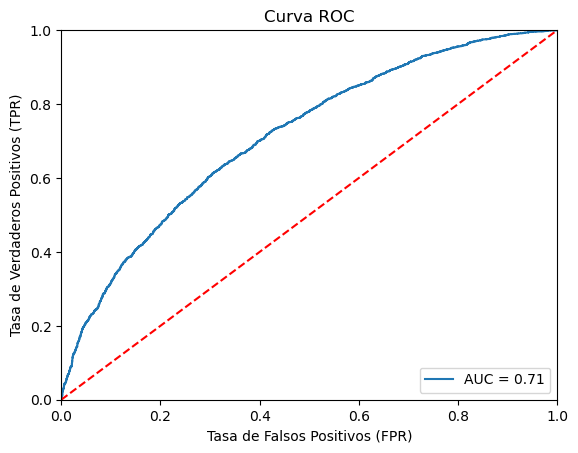

In [245]:
from sklearn.metrics import roc_curve, auc
y_pred_prob = logreg.predict_proba(x_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

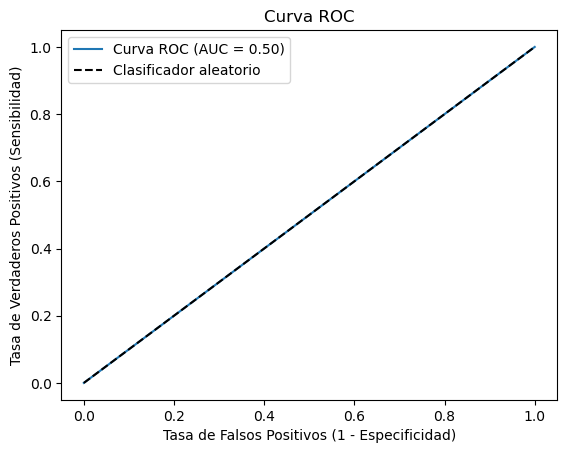

In [246]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

y_prob = logreg.predict_proba(x_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.legend()
plt.title('Curva ROC')
plt.show()


### K-NN

In [247]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=50)

knn.fit(x_train_scaled, y_train)

y_pred = knn.predict(x_test_scaled)

accuracyknn = accuracy_score(y_test, y_pred)
precisionknn = precision_score(y_test, y_pred)
recallknn = recall_score(y_test, y_pred)
f1knn = f1_score(y_test, y_pred)
confusionknn = confusion_matrix(y_test, y_pred)
balanced_accuracy_knn = balanced_accuracy_score(y_test, y_pred)
print("Balanced accuracy:", balanced_accuracy_knn)
print("Accuracy: {:.4f}".format(accuracyknn))
print("Precision: {:.4f}".format(precisionknn))
print("Recall: {:.4f}".format(recallknn))
print("F1-score: {:.4f}".format(f1knn))
print("Confusion Matrix:\n", confusionknn)


Balanced accuracy: 0.6054999999999999
Accuracy: 0.6055
Precision: 0.6105
Recall: 0.5827
F1-score: 0.5963
Confusion Matrix:
 [[1885 1115]
 [1252 1748]]


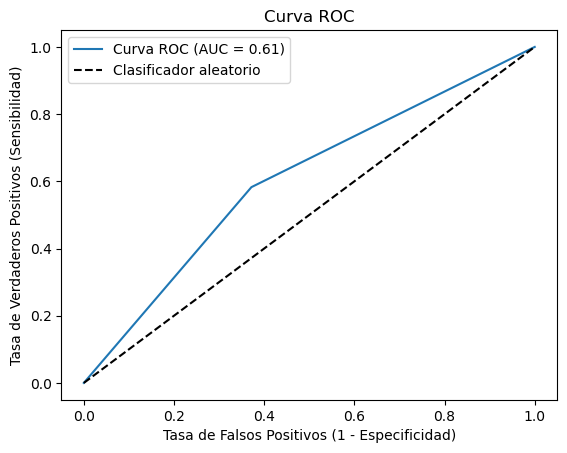

In [248]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.legend()
plt.title('Curva ROC')
plt.show()

In [249]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=50)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)


print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))
print("Confusion Matrix:\n", confusion)


Accuracy: 0.5640
Precision: 0.5677
Recall: 0.5370
F1-score: 0.5519
Confusion Matrix:
 [[1773 1227]
 [1389 1611]]


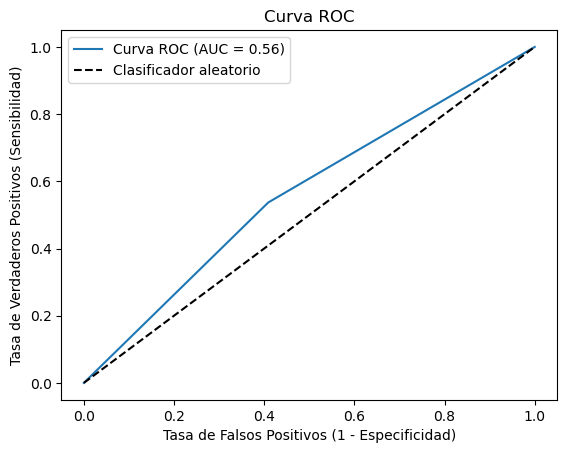

In [250]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.legend()
plt.title('Curva ROC')
plt.show()

### Árbol de Decisión

In [251]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


accuracytree = accuracy_score(y_test, y_pred)
precisiontree = precision_score(y_test, y_pred)
recalltree = recall_score(y_test, y_pred)
f1tree = f1_score(y_test, y_pred)
confusiontree = confusion_matrix(y_test, y_pred)

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

print("Accuracy:", accuracytree)
print("Precision:", precisiontree)
print("Recall:", recalltree)
print("F1-score:", f1tree)
print("Confusion Matrix:\n", confusiontree)


Balanced Accuracy: 0.5876666666666667
Accuracy: 0.5876666666666667
Precision: 0.5895166780122533
Recall: 0.5773333333333334
F1-score: 0.5833614011451668
Confusion Matrix:
 [[1794 1206]
 [1268 1732]]


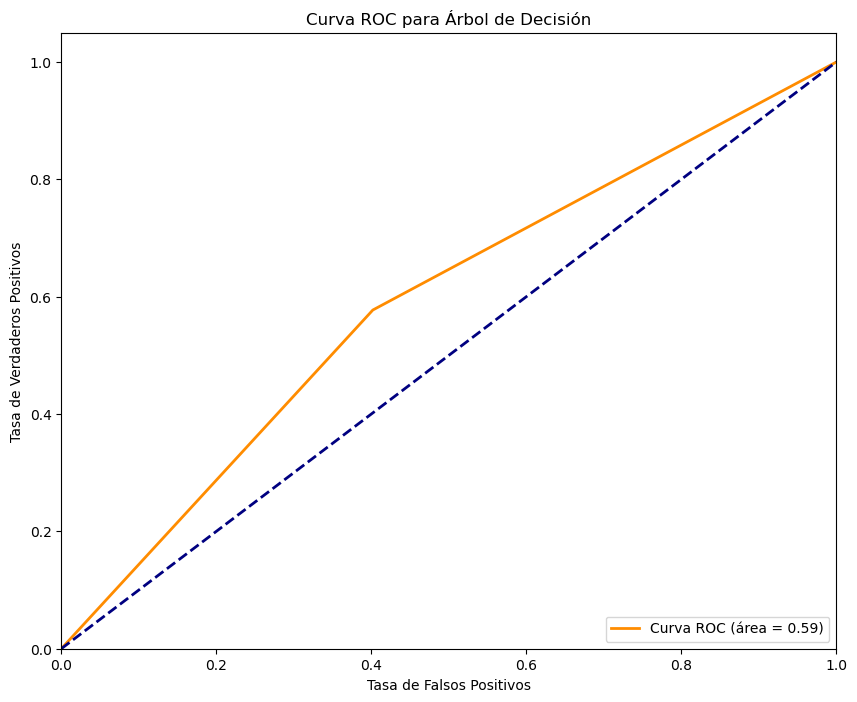

In [252]:
from sklearn.metrics import roc_curve, auc


y_score = clf.predict_proba(x_test)[:, 1]


fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Árbol de Decisión')
plt.legend(loc="lower right")
plt.show()


### Bagging Classifier

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


base_model = DecisionTreeClassifier()

bagging_model = BaggingClassifier(base_model)

n_estimators = [2,4,6,8,10,12,14,16,18,20]

mean_scores = []
std_scores = []

for n in n_estimators:
    bagging_model.set_params(n_estimators=n)
    scores = cross_val_score(bagging_model, x_train, y_train, cv=5)  
    mean_scores.append(np.mean(scores))  
    std_scores.append(np.std(scores))  

mean_scores = np.array(mean_scores)
std_scores = np.array(std_scores)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators, mean_scores, label='Mean Accuracy')
plt.fill_between(n_estimators, mean_scores - std_scores, mean_scores + std_scores, alpha=0.2, label='Standard Deviation')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Cross-Validation Curve for BaggingClassifier')
plt.show()


In [253]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split

base_classifier = DecisionTreeClassifier()


bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)


bagging_classifier.fit(x_train, y_train)

y_pred = bagging_classifier.predict(x_test)

accuracybag = accuracy_score(y_test, y_pred)
precisionbag = precision_score(y_test, y_pred)
recallbag = recall_score(y_test, y_pred)
f1bag = f1_score(y_test, y_pred)
roc_aucbag = roc_auc_score(y_test, y_pred)
balanced_accuracybag = balanced_accuracy_score(y_test, y_pred)

confusionbag = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracybag)
print("Precision: ", precisionbag)
print("Recall: ", recallbag)
print("F1-score: ", f1bag)
print("ROC AUC: ", roc_aucbag)
print("Balanced Accuracy: ", balanced_accuracybag)
print("Confusion Matrix:\n", confusionbag)


Accuracy:  0.6248333333333334
Precision:  0.6422331940751994
Recall:  0.5636666666666666
F1-score:  0.6003905556541808
ROC AUC:  0.6248333333333332
Balanced Accuracy:  0.6248333333333334
Confusion Matrix:
 [[2058  942]
 [1309 1691]]


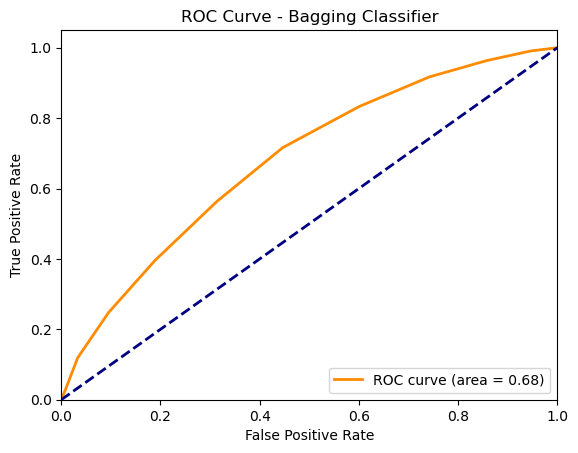

In [254]:
from sklearn.metrics import roc_curve, auc

y_prob = bagging_classifier.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bagging Classifier')
plt.legend(loc="lower right")
plt.show()


### Random Forest

In [255]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

rf_classifier = RandomForestClassifier(n_estimators=150, random_state=42)

rf_classifier.fit(x_train_scaled, y_train)

y_pred = rf_classifier.predict(x_test_scaled)

accuracyrf = accuracy_score(y_test, y_pred)
precisionrf = precision_score(y_test, y_pred, average='weighted')
recallrf = recall_score(y_test, y_pred, average='weighted')
f1rf = f1_score(y_test, y_pred, average='weighted')
confusionrf = confusion_matrix(y_test, y_pred)
roc_aucrf = roc_auc_score(y_test, y_pred)
balanced_accrf=balanced_accuracy_score(y_test,y_pred)

print("Accuracy: ", accuracyrf)
print("Precision: ", precisionrf)
print("Recall: ", recallrf)
print("F1-Score: ", f1rf)
print("Confusion Matrix: \n", confusionrf)
print("ROC AUC: ", roc_aucrf)
print("Balanced Accuracy: ", balanced_accrf)

Accuracy:  0.6578333333333334
Precision:  0.6578548191281591
Recall:  0.6578333333333334
F1-Score:  0.6578216897658323
Confusion Matrix: 
 [[1956 1044]
 [1009 1991]]
ROC AUC:  0.6578333333333333
Balanced Accuracy:  0.6578333333333333


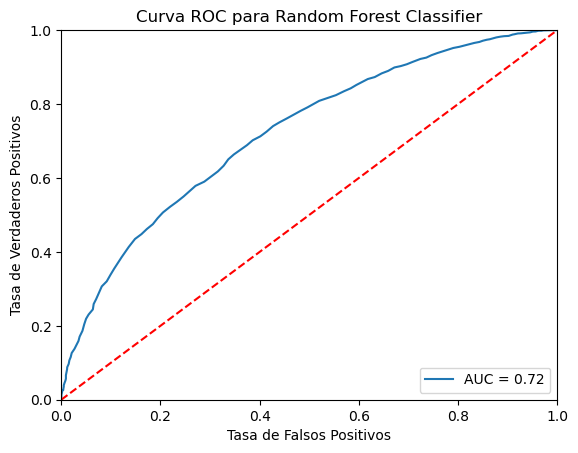

In [256]:
y_pred_prob = rf_classifier.predict_proba(x_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

### XGBoost

In [257]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [258]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [259]:

model = xgb.XGBClassifier()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

accuracyxgb = accuracy_score(y_test, y_pred)
precisionxgb = precision_score(y_test, y_pred)
recallxgb = recall_score(y_test, y_pred)
f1xgb = f1_score(y_test, y_pred)
roc_aucxgb = roc_auc_score(y_test, y_pred)
balanced_accuracyxgb = balanced_accuracy_score(y_test, y_pred)
confusionxgb = confusion_matrix(y_test, y_pred)



print("Accuracy: ", accuracyxgb)
print("Precision: ", precisionxgb)
print("Recall: ", recallxgb)
print("F1-score: ", f1xgb)
print("ROC AUC: ", roc_aucxgb)
print("Balanced Accuracy: ", balanced_accuracyxgb)
print("Matriz de Confusión", confusionxgb)


Accuracy:  0.6341666666666667
Precision:  0.6317512274959084
Recall:  0.6433333333333333
F1-score:  0.6374896779521056
ROC AUC:  0.6341666666666667
Balanced Accuracy:  0.6341666666666667
Matriz de Confusión [[1875 1125]
 [1070 1930]]


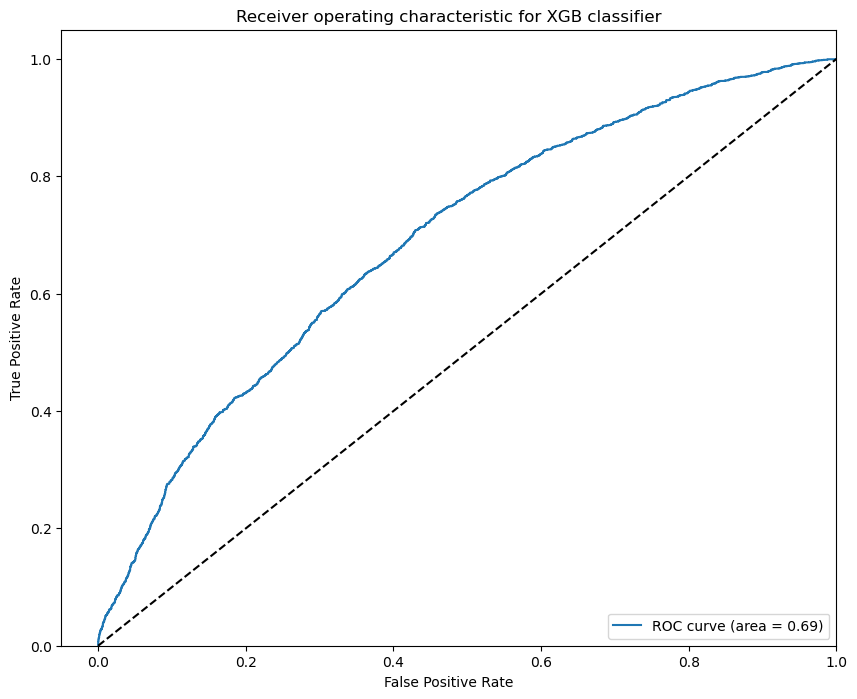

In [260]:
y_prob = model.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for XGB classifier')
plt.legend(loc="lower right")
plt.show()


### LightGBM

In [261]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [262]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score, confusion_matrix

clf = lgb.LGBMClassifier()

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracygbm = accuracy_score(y_test, y_pred)
precisiongbm = precision_score(y_test, y_pred)
recallgbm = recall_score(y_test, y_pred)
f1_scoregbm = f1_score(y_test, y_pred)
roc_aucgbm = roc_auc_score(y_test, y_pred)
balanced_accuracygbm = balanced_accuracy_score(y_test, y_pred)
confusiongbm = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.4f}".format(accuracygbm))
print("Precision: {:.4f}".format(precisiongbm))
print("Recall: {:.4f}".format(recallgbm))
print("F1 Score: {:.4f}".format(f1_scoregbm))
print("ROC AUC: {:.4f}".format(roc_aucgbm))
print("Balanced Accuracy: {:.4f}".format(balanced_accuracygbm))
print("Confusion Matrix:\n", confusiongbm)


Accuracy: 0.6548
Precision: 0.6515
Recall: 0.6660
F1 Score: 0.6586
ROC AUC: 0.6548
Balanced Accuracy: 0.6548
Confusion Matrix:
 [[1931 1069]
 [1002 1998]]


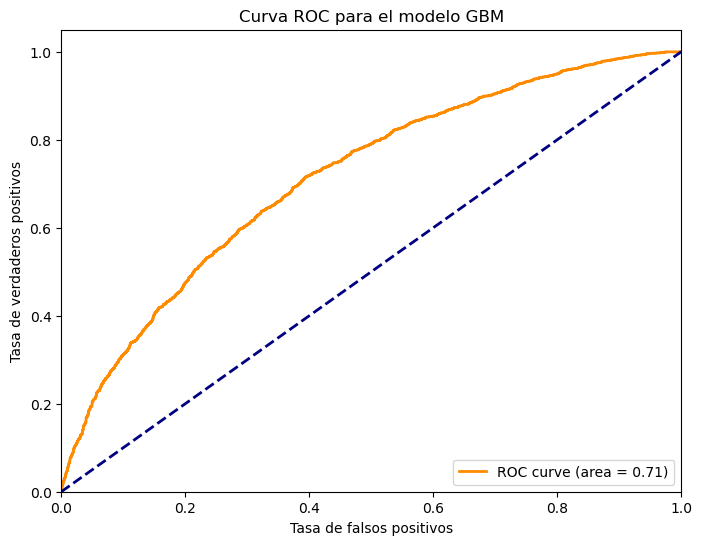

In [263]:

y_pred_proba = clf.predict_proba(x_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC para el modelo GBM')
plt.legend(loc="lower right")
plt.show()


## Pregunta 6: Métricas más convenientes

##### Dado que los modelos tratan de predecir si el pago de la hipoteca por parte del cliente se va a realizar al completo o si por el contrario la hipoteca quedará impagada, la métrica más conveniente personalmente es la Precisión (Precision) dado que al ser una intermediario financiero Leading Club o cualquier otro banco que conceda hipotecas una de sus principales misiones es minimizar el riesgo de impago de los activos que conforman sus carteras hipotecarias. 

##### Es por esto que considero que la precisión es la métrica más importante a tener en cuenta en este caso , ya que ofrece el dato de la proporción de predicciones correctas y por lo tanto es muy interesante para minimizar los falsos positivos, es decir, clientes que el modelo detecte que no poseen un alto riesgo de impago, pero que por el contrario si tienen un gran potencial de morosidad futura. Una alta precisión en el modelo significará que la mayoría de sus predicciones son acertadas por lo que se reducirá la tasa de morosidad, dato de gran importancia y muy controlado por las instituciones financieras y los supervisores. 

In [264]:

precisiones = {'Regresión Logística': precisionrl,
               'KNN': precisionknn,
               'Árbol de decisión': precisiontree,
               'Bagging': precisionbag,
               'Random Forest': precisionrf,
               'XGBoost': precisionxgb,
               'LightGBM': precisiongbm}

df_precisiones = pd.DataFrame.from_dict(precisiones, orient='index', columns=['Precisión'])

df_precisiones = df_precisiones.sort_values(by='Precisión', ascending=False)

df_precisiones

,Precisión
Random Forest,0.657855
LightGBM,0.651451
Regresión Logística,0.649738
Bagging,0.642233
XGBoost,0.631751
KNN,0.610548
Árbol de decisión,0.589517


##### Otra métrica que bajo mi punto de vista es importante pero no tanto como la precisión, ya que para los servicios financieros su principal factor es reducir el riesgo , existe otra variable de gran importancia para ellos, la rentabilidad y el beneficio, como cualquier otro negocio. Es por esto que me parece interesante la métrica F1 Score, ya que combina la precision y el recall, es decir combina que se maximicen los verdaderos positivos y a su vez que se minimicen los falsos negativos, es decir tratas de asegurarte de que los clientes de bajo riesgo, realmente sean de bajo riesgo, y que el modelo no califique a muchos clientes como si fuesen de riesgo alto , si realmente son de riesgo bajo, algo que puede provocar que los bancos rechacen concesiones hipotecarias a clientes que cumplian el perfil pero que el modelo habia identificado incorrectamente y eso provocaría un descenso en el número de hipotecas concedidas y por lo tanto una reducción en los ingresos y beneficios. 

In [265]:
f1_scores = {'Regresión Logística': f1rl,
             'KNN': f1knn,
             'Árbol de decisión': f1tree,
             'Bagging': f1bag,
             'Random Forest': f1rf,
             'XGBoost': f1xgb,
             'LightGBM': f1_scoregbm}

df_f1_scores = pd.DataFrame.from_dict(f1_scores, orient='index', columns=['F1 Score'])

df_f1_scores_sorted = df_f1_scores.sort_values(by='F1 Score', ascending=False)
df_f1_scores_sorted


,F1 Score
LightGBM,0.658645
Random Forest,0.657822
Regresión Logística,0.655321
XGBoost,0.637490
Bagging,0.600391
KNN,0.596282
Árbol de decisión,0.583361


##### En ambas métricas se observa que el modelo más preciso es Random Forest por lo que en caso de utilizar un modelo para la clasificación de los clientes propondría el uso del Modelo Random Forest, seguido de Regresión Logística

## Pregunta 7:Impotancia de las variables

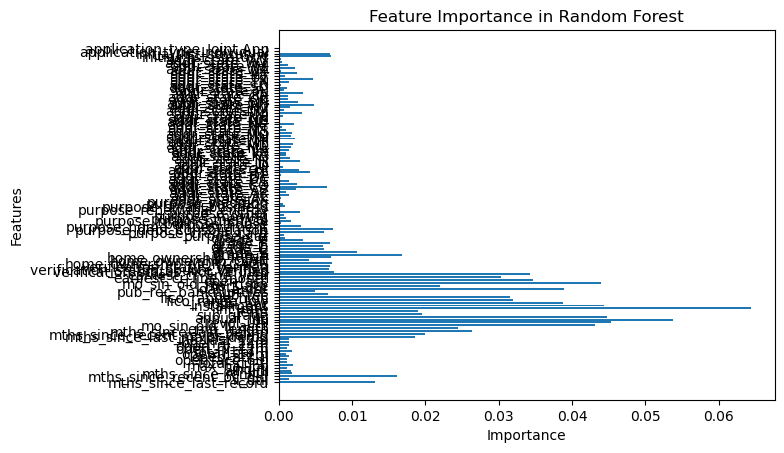

In [266]:
importance = rf_classifier.feature_importances_
plt.barh(range(x_train.shape[1]), importance, height=0.7)
plt.yticks(np.arange(x_train.shape[1]), x_train.columns)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()


Al hacer la prueba de la clasificación de las variables con el modelo Random forest, observo que existen demasiadas variables y no se aprecian correctamente las importantes, por lo que añado un filtro para que exclusivamente aparezcan la que tienen una importancia relativa superior al resto. 

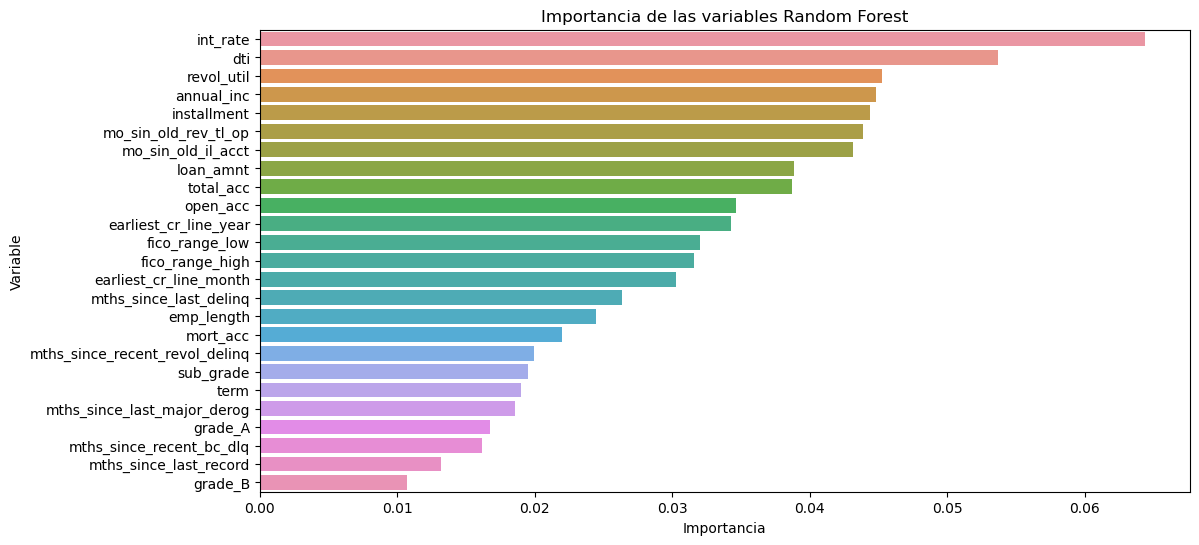

In [267]:

importances = rf_classifier.feature_importances_

feature_importances = pd.DataFrame({'Variable':x_train.columns, 'Importancia':importances})

feature_importances = feature_importances.sort_values('Importancia', ascending = False)

feature_importances = feature_importances[feature_importances['Importancia'] > 0.01]

plt.figure(figsize=(12,6))
sns.barplot(x='Importancia', y='Variable', data=feature_importances)
plt.title('Importancia de las variables Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()


#### Modelo LIGHT GBM

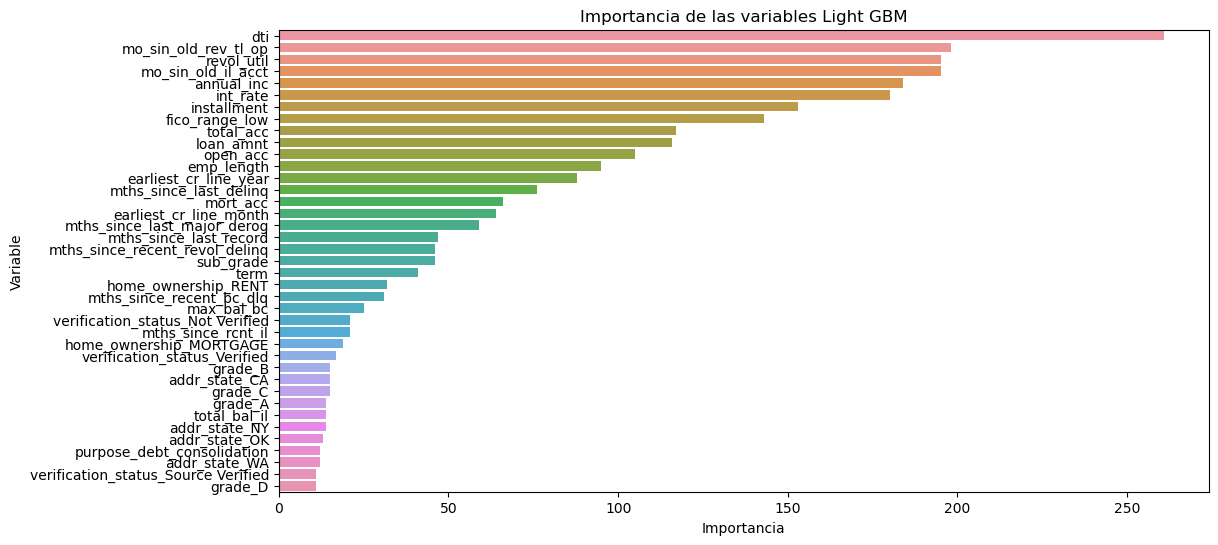

In [268]:
importances = clf.feature_importances_

feature_importances = pd.DataFrame({'Variable':x_train.columns, 'Importancia':importances})

feature_importances = feature_importances.sort_values('Importancia', ascending = False)

feature_importances = feature_importances[feature_importances['Importancia'] > 10]

plt.figure(figsize=(12,6))
sns.barplot(x='Importancia', y='Variable', data=feature_importances)
plt.title('Importancia de las variables Light GBM')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

#### Modelo XGBoost

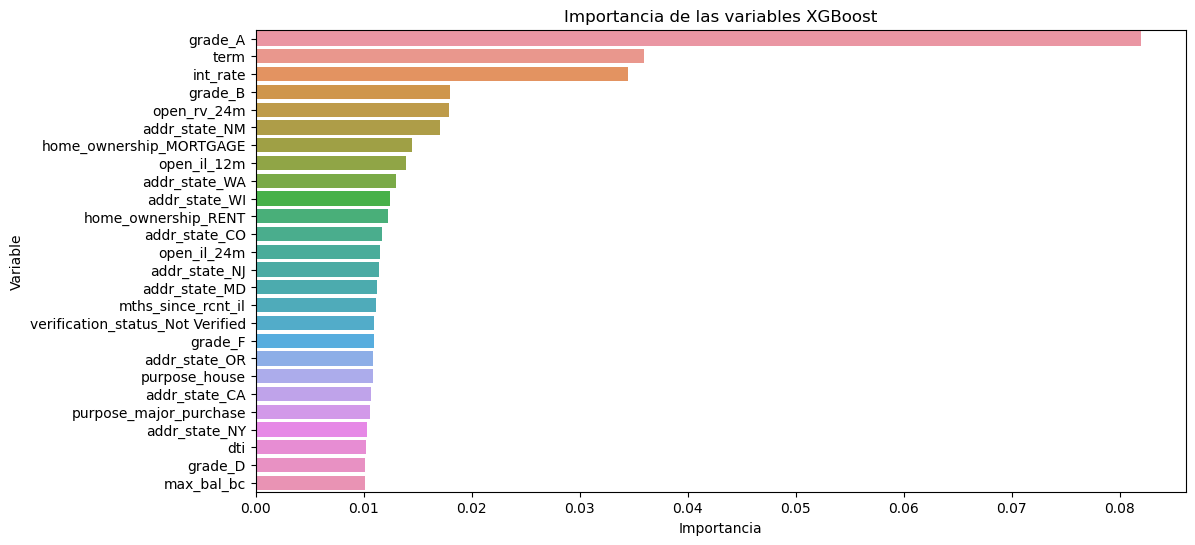

In [269]:
importances = model.feature_importances_

feature_importances = pd.DataFrame({'Variable':x_train.columns, 'Importancia':importances})

feature_importances = feature_importances.sort_values('Importancia', ascending = False)

feature_importances = feature_importances[feature_importances['Importancia'] > 0.01]

plt.figure(figsize=(12,6))
sns.barplot(x='Importancia', y='Variable', data=feature_importances)
plt.title('Importancia de las variables XGBoost')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

#### Modelo Arbol de Decision

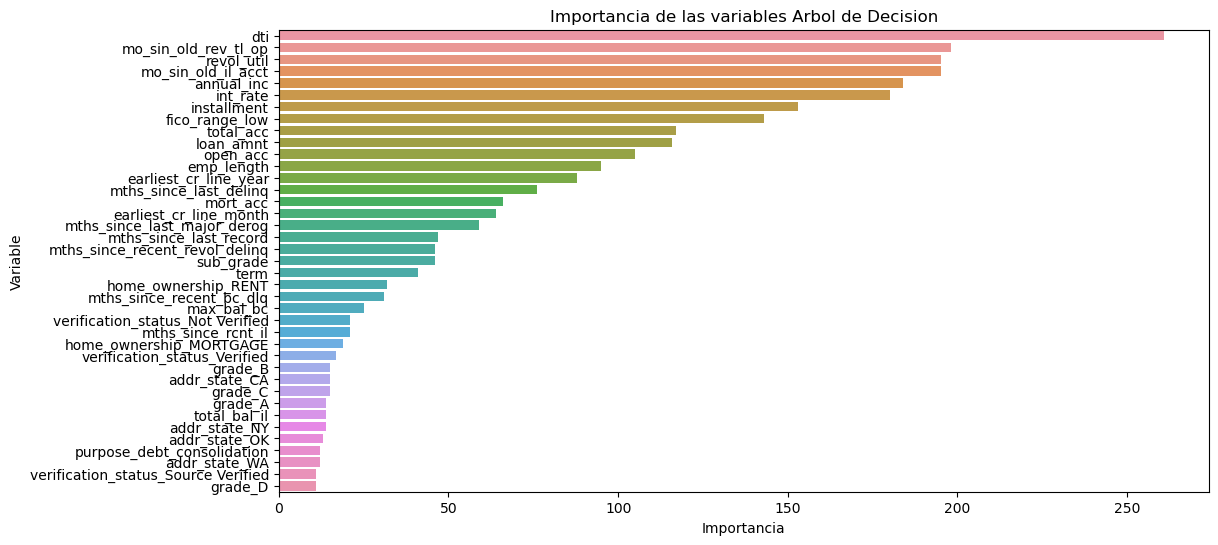

In [270]:
importances = clf.feature_importances_

feature_importances = pd.DataFrame({'Variable':x_train.columns, 'Importancia':importances})

feature_importances = feature_importances.sort_values('Importancia', ascending = False)

feature_importances = feature_importances[feature_importances['Importancia'] > 10]

plt.figure(figsize=(12,6))
sns.barplot(x='Importancia', y='Variable', data=feature_importances)
plt.title('Importancia de las variables Arbol de Decision')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()